# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Santiago silva estacio

Identificación: 1001447460

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [1]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

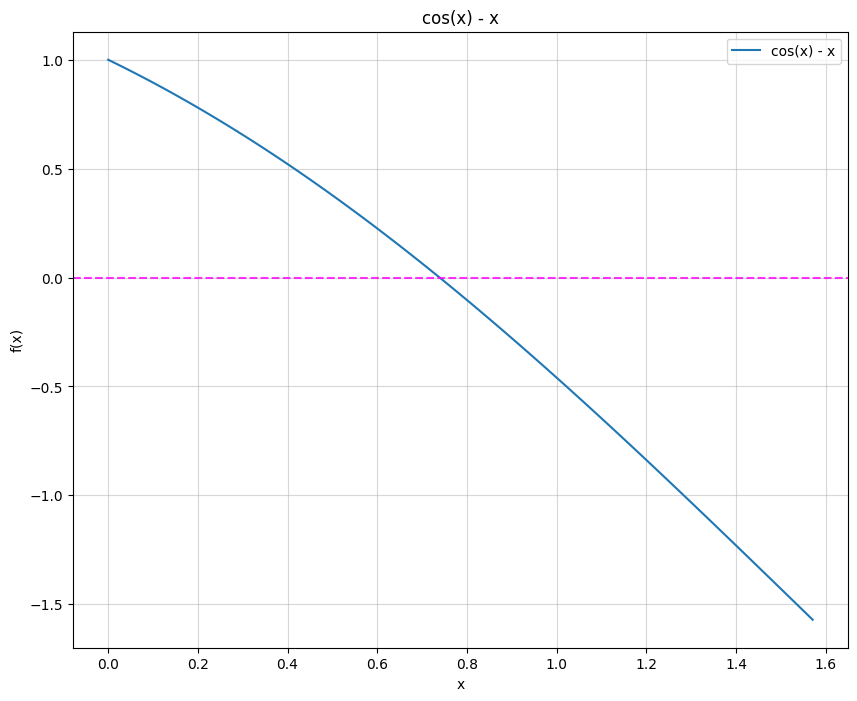

Aproximación inicial de la raíz: 0.745732
Método de Ridder: raíz = 0.7390851332, iteraciones = 3
Método de Bisección: raíz = 0.7390851332, iteraciones = 32
Método de la Secante: raíz = 0.7390851332, iteraciones = 7


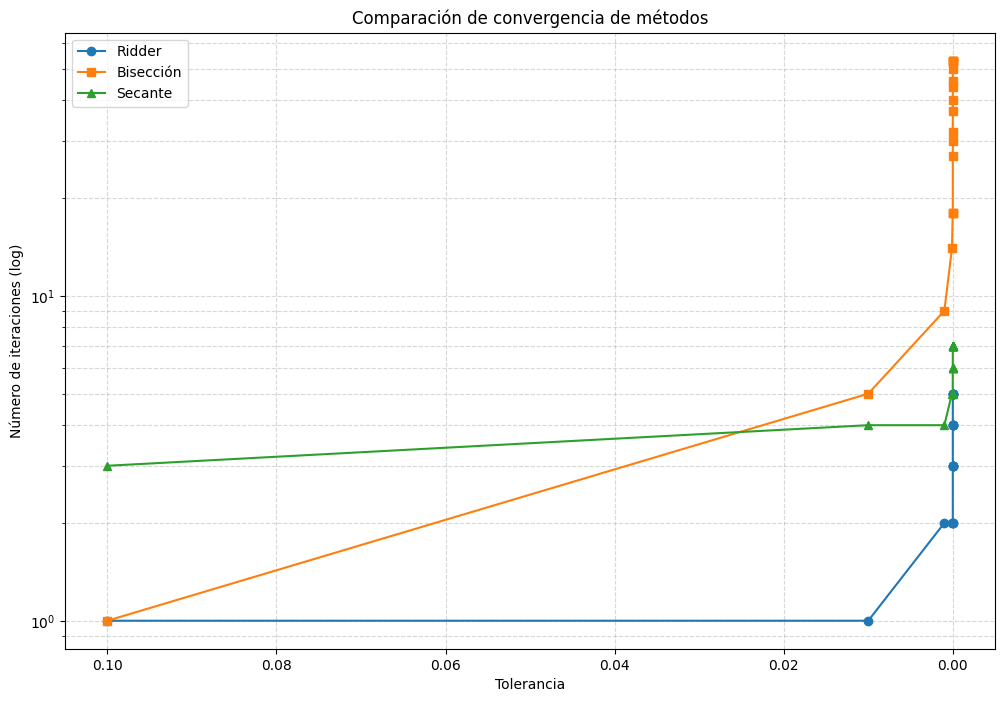

In [40]:
def ridder(f, a, b, tol=1e-10, max_iter=1000): #donde f: funcion que evalua la raiz, [a, b] son los extremos del intervalo
               #tol: la tolerancia que definimos para el criterio de parada, max_iter: el ## maximo de iteraciones permitidas
    fa = f(a)
    fb = f(b)

    if fa * fb >= 0:
        raise ValueError('se debe cumplir f(a) > f(b)')

    iterations = 0 #las iteraciones a realizar
    root = None #aproximacion de la raiz

    for _ in range(max_iter):
        iterations += 1
        m = (a + b) / 2 #calculo del punto medio
        fm = f(m)

        s = np.sqrt(fm**2 - fa*fb) #calculo de la correcion exponencial
        if s == 0:
            break

        x = m + (m - a) * fm / s * np.sign(fa - fb) #calculamos el nuevo candidato
        fx = f(x)

        #Actualizamos el intervalo
        if fm * fx < 0:
            a, b = m, x
            fa, fb = fm, fx
        elif fa * fx < 0:
            b = x
            fb = fx
        else:
            a = x
            fa = fx

        #Criterio de parada
        if abs(fx) < tol or abs(b - a) < tol:
            root = x
            break

    return root, iterations

#Definimos la función cos(x) - x = 0
def f(x):
    return np.cos(x) - x

#la función se va a graficar en [0, pi/2]
x_vals = np.linspace(0, np.pi/2, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10, 8))
plt.plot(x_vals, y_vals, label='cos(x) - x')
plt.axhline(0, color='magenta', linestyle='--', alpha=0.8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('cos(x) - x')
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

#Creamos el  DataFrame y encontramos la primer aproximación inicial
df = pd.DataFrame({'x': x_vals, 'f(x)': y_vals})
df['abs_fx'] = np.abs(df['f(x)'])
aprox_inicial = df.loc[df['abs_fx'].idxmin(), 'x']
print(f"Aproximación inicial de la raíz: {aprox_inicial:.6f}")

#Definimos el  intervalo para los métodos siguientes
a, b = 0, np.pi/2

#Encontrar raíz con metodo ridder
root_ridder, iter_ridder = ridder(f, a, b, tol=1e-10)
print(f"Método de Ridder: raíz = {root_ridder:.10f}, iteraciones = {iter_ridder}")

#Comparar con otros métodos
def bisection(f, a, b, tol=1e-6, max_iter=100): #metodo biseccion

    fa = f(a)
    fb = f(b)
    iterations = 0

    if fa * fb >= 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo")

    for _ in range(max_iter):
        iterations += 1
        c = (a + b) / 2
        fc = f(c)

        if abs(fc) < tol or abs(b - a) < tol:
            return c, iterations

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (a + b)/2, iterations

def secant(f, x0, x1, tol=1e-6, max_iter=100): #metodo secante

    f0 = f(x0)
    f1 = f(x1)
    iterations = 0

    for _ in range(max_iter):
        iterations += 1
        if abs(f1) < tol:
            return x1, iterations

        #Evitamos la  división por cero
        if f1 - f0 == 0:
            break

        x_nuevo = x1 - f1 * (x1 - x0) / (f1 - f0)
        x0, x1 = x1, x_nuevo
        f0, f1 = f1, f(x_nuevo)

    return x1, iterations

root_bisect, iter_bisect = bisection(f, a, b, tol=1e-10)
root_secant, iter_secant = secant(f, a, b, tol=1e-10)

print(f"Método de Bisección: raíz = {root_bisect:.10f}, iteraciones = {iter_bisect}")
print(f"Método de la Secante: raíz = {root_secant:.10f}, iteraciones = {iter_secant}")

#Comparación de convergencia para diferentes tolerancias
tol_list = np.logspace(-1, -20, 20)
iter_ridder_list = []
iter_bisect_list = []
iter_secant_list = []

for tol in tol_list:
    _, iter_ridder = ridder(f, a, b, tol=tol)
    _, iter_bisect = bisection(f, a, b, tol=tol)
    _, iter_secant = secant(f, a, b, tol=tol)

    iter_ridder_list.append(iter_ridder)
    iter_bisect_list.append(iter_bisect)
    iter_secant_list.append(iter_secant)

#Graficamos los  resultados
plt.figure(figsize=(12, 8))
plt.semilogy(tol_list, iter_ridder_list, 'o-', label='Ridder')
plt.semilogy(tol_list, iter_bisect_list, 's-', label='Bisección')
plt.semilogy(tol_list, iter_secant_list, '^-', label='Secante')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones (log)')
plt.title('Comparación de convergencia de métodos')
plt.legend()
plt.grid(True, which="both", ls="--", alpha = 0.5)
plt.gca().invert_xaxis()  #Para mostrar tolerancias más pequeñas a la derecha
plt.show()

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





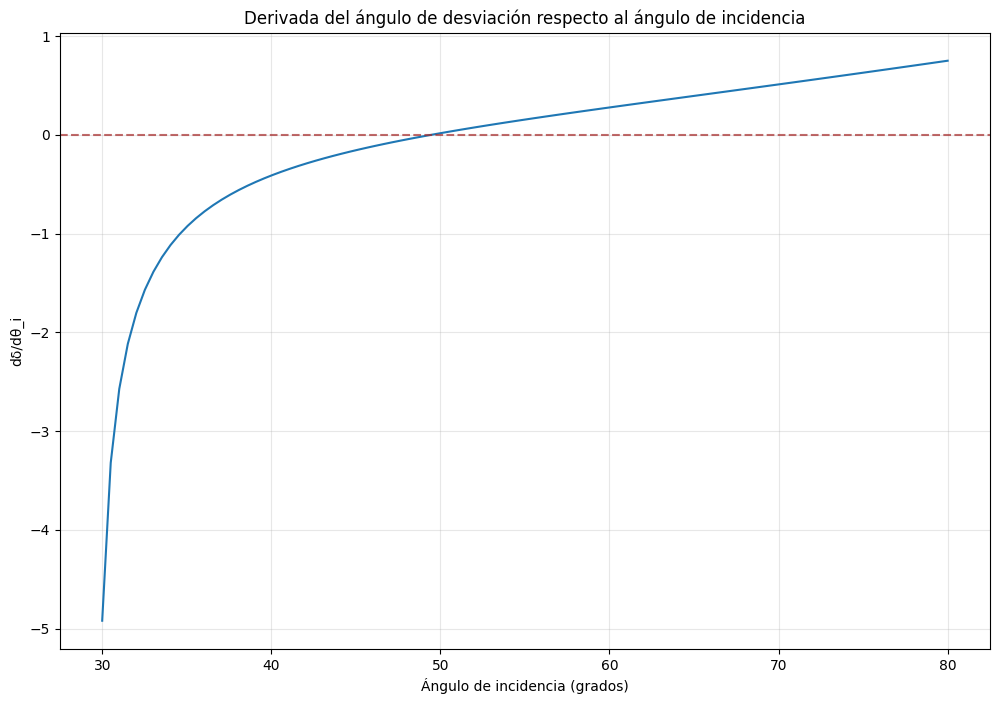

Ángulo de incidencia para desviación mínima (Newton-Raphson): 49.4642°
Ángulo de incidencia para desviación mínima (Secante): 49.4642°
Ángulo de desviación mínima: 38.9284°
Ángulo de incidencia máximo teórico: 29.430187°

Evaluación de la funcion en  ciertos puntos clave:
θ_i = 0.0° → f(θ_i) = 0.208131
θ_i = 3.3° → f(θ_i) = 0.188757
θ_i = 6.5° → f(θ_i) = 0.168230
θ_i = 9.8° → f(θ_i) = 0.146626
θ_i = 13.1° → f(θ_i) = 0.124033
θ_i = 16.4° → f(θ_i) = 0.100548
θ_i = 19.6° → f(θ_i) = 0.076280
θ_i = 22.9° → f(θ_i) = 0.051346
θ_i = 26.2° → f(θ_i) = 0.025874
θ_i = 29.4° → f(θ_i) = 0.000000

Ángulo de incidencia crítico (método de la bisección): 29.430187°

Verificación:
θ_i crítico = 29.430187°
θ_r crítico = 18.860490°
A - θ_r crítico = 41.139510°
sin(A - θ_r) = 0.657895
1/n = 0.657895
Diferencia = 0.00e+00


In [39]:
#Parámetros dados del prisma
n = 1.52  # }el indice de refracción
A = np.deg2rad(60)  #el angulo del prisma en radianes

def delta(theta_i):#lafuncion va calcular el angulo de desviacion total δ para un prisma, un theta_i será es angulo de incidencia en radianes
    ##la funcion nos va retornar el angulo de desviacion en radianes

    theta_r = np.arcsin(np.sin(theta_i) / n)
    term = n * np.sin(A - theta_r)
    return theta_i + np.arcsin(term) - A

def ddelta_dtheta_i(theta_i): #ahora definimos para la derivada del angulo de desviacion respecto al angulo de incidencia
#el theta_i sigue siendo el angulo de incidencia en radianes y nos va retornas el valor de la derivada dδ/dθ_i

    theta_r = np.arcsin(np.sin(theta_i) / n)
    numerator = np.cos(theta_i) * np.cos(A - theta_r)
    denominator = np.cos(theta_r) * np.sqrt(1 - n**2 * np.sin(A - theta_r)**2)
    return 1 - numerator / denominator

#graficam la derivada en el intervalo [30°, 80°]
theta_i_deg = np.linspace(30, 80, 100)
theta_i_rad = np.deg2rad(theta_i_deg)
deriv_values = ddelta_dtheta_i(theta_i_rad)

plt.figure(figsize=(12, 8))
plt.plot(theta_i_deg, deriv_values)
plt.axhline(0, color='brown', linestyle='--', alpha=0.7)
plt.xlabel('Ángulo de incidencia (grados)')
plt.ylabel('dδ/dθ_i')
plt.title('Derivada del ángulo de desviación respecto al ángulo de incidencia')
plt.grid(True, alpha = 0.3)
plt.show()

#ahora procedemos a encontrar el ángulo de desviacion minimo usando Newton-Raphson y Secante
#Usamos la derivada ya que el mínimo ocurre cuando dδ/dθ_i = 0

#Método de Newton-Raphson
theta_min_newton = newton(ddelta_dtheta_i, np.deg2rad(50))  # Valor inicial 50°

#Método de la Secante, este es la aproximación de la derivada
def secant(f, x0, x1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if abs(f1) < tol:
            return x1
        x_new = x1 - f1 * (x1 - x0) / (f1 - f0)
        x0, x1 = x1, x_new
    return x1

theta_min_secant = secant(ddelta_dtheta_i, np.deg2rad(40), np.deg2rad(60))

# Resultados
print(f"Ángulo de incidencia para desviación mínima (Newton-Raphson): {np.rad2deg(theta_min_newton):.4f}°")
print(f"Ángulo de incidencia para desviación mínima (Secante): {np.rad2deg(theta_min_secant):.4f}°")
print(f"Ángulo de desviación mínima: {np.rad2deg(delta(theta_min_newton)):.4f}°")


###parte b, angulo de incidencia
def critical_condition(theta_i): #la funcion nos define la condicion para la reflexion interna total
#el theta_i permanece siendo el angulo de incidencia en radianes
#nos va a regresar el valor de sin(A - θ_r) - 1/n

    theta_r = np.arcsin(np.sin(theta_i) / n)
    return np.sin(A - theta_r) - 1/n

#vamos a encontrar el rango válido para el  cual theta_i donde existe la solución
#recordar que el ángulo de incidencia debe satisfacer que sin(theta_i)/n <= 1

#vamos a calcular el ángulo de incidencia máximo permitido
theta_i_max = np.arcsin(n * np.sin(A - np.arcsin(1/n)))
print(f"Ángulo de incidencia máximo teórico: {np.rad2deg(theta_i_max):.6f}°")

#verificamos los valores en el rango
theta_test = np.linspace(0, np.rad2deg(theta_i_max), 10)
print("\nEvaluación de la funcion en  ciertos puntos clave:")
for angle in theta_test:
    val = critical_condition(np.deg2rad(angle))
    print(f"θ_i = {angle:.1f}° → f(θ_i) = {val:.6f}")

#aplicamos la  bisección en el intervalo [0, theta_i_max]
try:
    theta_crit = bisect(critical_condition, 0, theta_i_max)
    print(f"\nÁngulo de incidencia crítico (método de la bisección): {np.rad2deg(theta_crit):.6f}°")

    #ahora vamos a realizar la verificación detallada
    theta_r_crit = np.arcsin(np.sin(theta_crit) / n)
    condition = np.sin(A - theta_r_crit)
    print("\nVerificación:")
    print(f"θ_i crítico = {np.rad2deg(theta_crit):.6f}°")
    print(f"θ_r crítico = {np.rad2deg(theta_r_crit):.6f}°")
    print(f"A - θ_r crítico = {np.rad2deg(A - theta_r_crit):.6f}°")
    print(f"sin(A - θ_r) = {condition:.6f}")
    print(f"1/n = {1/n:.6f}")
    print(f"Diferencia = {abs(condition - 1/n):.2e}")

except ValueError as e: #si hay algún tipo de error en los calculos, pensamos en posibles causas como que la solucion no esta en el I
#la funcion puede no ser continua en I
#con los parametros dados, no es posible una reflexion interna total
#yo me equivoqué
    print(f"\nError: {e}")
    print("Posibles causas:")
    print("1. No hay solución en el intervalo dado")
    print("2. La función no es continua en el intervalo")
    print("3. Los parámetros del prisma no permiten reflexión interna total")
    print("4. puede existir algún error en el código")